In [2]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset from csv file using pandas
previous_application = pd.read_csv(r"G:\EDA Case Study\previous_application.csv")
application_data = pd.read_csv(r"G:\EDA Case Study\application_data.csv")

In [4]:
#to view large outputs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Check the structure of data(Normal routine check)

In [5]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
application_data.shape

(307511, 122)

In [7]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Data Quality Check

1. Find the % missing value for all the columns

In [9]:
#Code to find number of Nulls present in each Column
application_data.isnull().sum()

# % null in each column upto 2 decimal places
print(round(100*(application_data.isnull().sum()/len(application_data.index)),2))

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

2. Remove the columns with high missing % (50% nulls)

In [10]:
emptycol=application_data.isnull().sum()
emptycol=list(emptycol[emptycol.values>=0.5*len(application_data)].index)
application_data.drop(labels=emptycol,axis=1,inplace=True)

In [11]:
emptyrow=application_data.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.5*len(application_data)].index)
application_data.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [12]:
print(round(100*(application_data.isnull().sum()/len(application_data.index)),2))

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

Based on above Column Level Analysis, We can remove below list of column's which is not adding any meaning to analysis.

In [13]:
 application_data = application_data.drop(['OBS_30_CNT_SOCIAL_CIRCLE',
                                            'DEF_30_CNT_SOCIAL_CIRCLE',
                                            'OBS_60_CNT_SOCIAL_CIRCLE',
                                            'DEF_60_CNT_SOCIAL_CIRCLE',
                                           'REGION_POPULATION_RELATIVE',
                                           'DAYS_REGISTRATION',
                                           'DAYS_ID_PUBLISH',
                                           'WEEKDAY_APPR_PROCESS_START',
                                           'HOUR_APPR_PROCESS_START',
                                           'YEARS_BEGINEXPLUATATION_AVG',                  
                                            'YEARS_BEGINEXPLUATATION_MODE',                
                                            'YEARS_BEGINEXPLUATATION_MEDI', 
                                            'FLOORSMAX_MODE',
                                            'FLOORSMAX_AVG',
                                            'FLOORSMAX_MEDI',               
                                            'TOTALAREA_MODE',               
                                            'EMERGENCYSTATE_MODE',
                                            'FLAG_DOCUMENT_2',
                                            'FLAG_DOCUMENT_3',
                                            'FLAG_DOCUMENT_4',
                                            'FLAG_DOCUMENT_5',
                                            'FLAG_DOCUMENT_6',
                                            'FLAG_DOCUMENT_7',
                                            'FLAG_DOCUMENT_8',
                                            'FLAG_DOCUMENT_9',
                                            'FLAG_DOCUMENT_10',
                                            'FLAG_DOCUMENT_11',
                                            'FLAG_DOCUMENT_12',
                                            'FLAG_DOCUMENT_13',
                                            'FLAG_DOCUMENT_14',
                                            'FLAG_DOCUMENT_15',
                                            'FLAG_DOCUMENT_16',
                                            'FLAG_DOCUMENT_17',
                                            'FLAG_DOCUMENT_18',
                                            'FLAG_DOCUMENT_19',
                                            'FLAG_DOCUMENT_20',
                                            'FLAG_DOCUMENT_21',
                       ], axis=1)

3. Imputing values for below list of columns which has less % of missing values (around 13%)

In [14]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [15]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [16]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

#### Imputing Values for below list of column's 
- based on above analysis, we tried to find the most frequent occuring value i.e. median values, use it for imputation.

In [17]:
# AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON
application_data['AMT_REQ_CREDIT_BUREAU_HOUR']= application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value=0.0)
application_data['AMT_REQ_CREDIT_BUREAU_DAY']= application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value=0.0)
application_data['AMT_REQ_CREDIT_BUREAU_WEEK']= application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value=0.0)
application_data['AMT_REQ_CREDIT_BUREAU_MON']= application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value=0.0)
application_data['AMT_REQ_CREDIT_BUREAU_QRT']= application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value=0.0)
application_data['AMT_REQ_CREDIT_BUREAU_YEAR']= application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value=0.0)

### Categorical Unordered Univariate Analysis

In [18]:
# Description for occupation_type
print(application_data.OCCUPATION_TYPE.describe())
print("\n")
print(application_data.OCCUPATION_TYPE.value_counts(normalize=True)*100)

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object


Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64


-  W.R.T below analysis we can see laborers are the highest loan takers among all the profession.

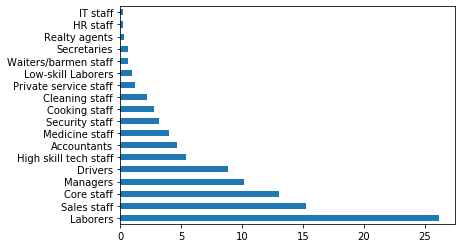

In [19]:
#Analysis of Occupation_type column
(application_data.OCCUPATION_TYPE.value_counts(normalize=True)*100).plot.barh()
plt.show()

#### Suggestion :-
##### 1) on describing the column we found that most of the people are Labourers as profession 
#### 2) we can impute the missing/null values from this profession i.e "Labourers"

In [21]:
# Removing 31% nulls for categorical column.
application_data = application_data.dropna(axis=0, subset=['OCCUPATION_TYPE'])

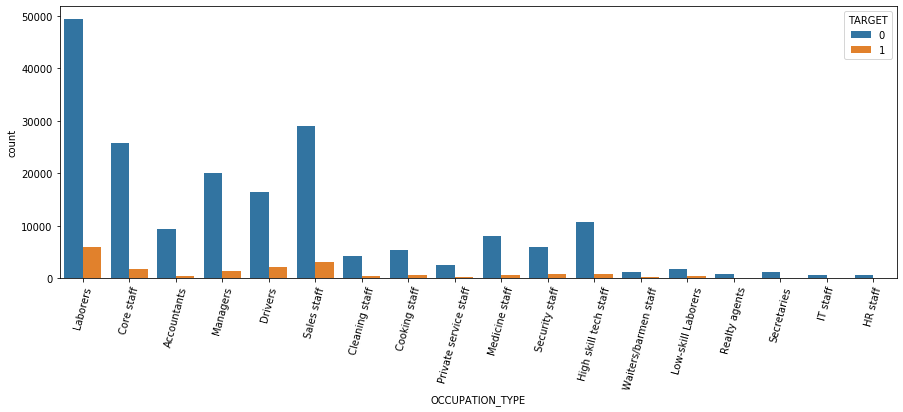

In [20]:
plt.figure(figsize= [15,5])
chart = sns.countplot(x='OCCUPATION_TYPE',hue='TARGET',data = application_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 75)
plt.show()

From the abvove graph, Laborers are the highest defaulters as well as non defaulters among all profession.

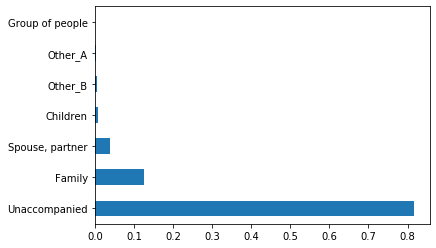

In [22]:
application_data.NAME_TYPE_SUITE.value_counts(normalize=True).plot.barh()
plt.show()

Most of the people taking loans are unaccompanied.

In [23]:
#dropping all the null record for this categorical column.
application_data = application_data.dropna(axis=0, subset=['NAME_TYPE_SUITE'])

In [27]:
print(application_data.CODE_GENDER.value_counts(normalize=True))
print("\n")
print(application_data.CODE_GENDER.describe())

F    0.612517
M    0.387483
Name: CODE_GENDER, dtype: float64


count     210213
unique         2
top            F
freq      128759
Name: CODE_GENDER, dtype: object


There are some value mentioned as 'XNA' which means 'Not Available'. So we have to impute values with the most frequent occuring values.

In [25]:
# Updating the column 'CODE_GENDER' with "F" for the dataset
application_data.loc[application_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
application_data['CODE_GENDER'].value_counts()

F    128759
M     81454
Name: CODE_GENDER, dtype: int64

In [28]:
#Data Sanity check
round(100*(application_data.isnull().sum()/307511),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
OCCUPATION_TYPE                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
R

In [29]:
#sns.boxplot(application_data['EXT_SOURCE_3'])
#plt.show()
#application_data['EXT_SOURCE_3'].median() # 0.5226973172821112
#application_data['EXT_SOURCE_3'].mode() # 0.7463
#application_data['EXT_SOURCE_3'].mean() -- 0.5009057

application_data['EXT_SOURCE_3'] = application_data['EXT_SOURCE_3'].fillna(application_data['EXT_SOURCE_3'].mean())

4. Check for datatypes for all the columns. If incorrect change it to suitable datatype.

In [30]:
# Lets look at the number of unique categories for all the column's to identify categorical & continuous variables.
application_data.nunique().sort_values()

FLAG_MOBIL                          1
FLAG_CONT_MOBILE                    2
REG_REGION_NOT_WORK_REGION          2
REG_REGION_NOT_LIVE_REGION          2
FLAG_EMAIL                          2
FLAG_PHONE                          2
FLAG_WORK_PHONE                     2
FLAG_EMP_PHONE                      2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_REALTY                     2
CODE_GENDER                         2
FLAG_OWN_CAR                        2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
NAME_INCOME_TYPE                    7
NAME_TYPE_SUITE                     7
AMT_REQ_CREDIT_BUREAU_DAY           8
AMT_REQ_CRED

In [31]:
application_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS          

- Based on above analysis run using dataframe.info and application_data.nunique(). we can see below datatypes are not correctly mapped.

In [32]:
# Following variables could not be float(number of days, number of enquiries, number of family members, number of people in social circle.)

application_data['CNT_FAM_MEMBERS']=application_data['CNT_FAM_MEMBERS'].astype(int, errors='ignore')
application_data['AMT_REQ_CREDIT_BUREAU_HOUR']=application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(object, errors='ignore')
application_data['AMT_REQ_CREDIT_BUREAU_DAY']=application_data['AMT_REQ_CREDIT_BUREAU_DAY'].astype(object, errors='ignore')
application_data['AMT_REQ_CREDIT_BUREAU_WEEK']=application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(object, errors='ignore')
application_data['AMT_REQ_CREDIT_BUREAU_MON']=application_data['AMT_REQ_CREDIT_BUREAU_MON'].astype(object, errors='ignore')
application_data['AMT_REQ_CREDIT_BUREAU_QRT']=application_data['AMT_REQ_CREDIT_BUREAU_QRT'].astype(object, errors='ignore')
application_data['AMT_REQ_CREDIT_BUREAU_YEAR']=application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(object, errors='ignore')

In [33]:
application_data.loc[:, 'FLAG_MOBIL'] = application_data.loc[:, 'FLAG_MOBIL'].astype(object)
application_data.loc[:, 'FLAG_EMP_PHONE'] = application_data.loc[:, 'FLAG_EMP_PHONE'].astype(object)
application_data.loc[:, 'FLAG_WORK_PHONE'] = application_data.loc[:, 'FLAG_WORK_PHONE'].astype(object)
application_data.loc[:, 'FLAG_CONT_MOBILE'] = application_data.loc[:, 'FLAG_CONT_MOBILE'].astype(object)
application_data.loc[:, 'FLAG_PHONE'] = application_data.loc[:, 'FLAG_PHONE'].astype(object)
application_data.loc[:, 'FLAG_EMAIL'] = application_data.loc[:, 'FLAG_EMAIL'].astype(object)
application_data.loc[:, 'REGION_RATING_CLIENT'] = application_data.loc[:, 'REGION_RATING_CLIENT'].astype(object)
application_data.loc[:, 'REGION_RATING_CLIENT_W_CITY'] = application_data.loc[:, 'REGION_RATING_CLIENT_W_CITY'].astype(object)
application_data.loc[:, 'REG_REGION_NOT_LIVE_REGION'] = application_data.loc[:, 'REG_REGION_NOT_LIVE_REGION'].astype(object)
application_data.loc[:, 'REG_REGION_NOT_WORK_REGION'] = application_data.loc[:, 'REG_REGION_NOT_WORK_REGION'].astype(object)
application_data.loc[:, 'LIVE_CITY_NOT_WORK_CITY'] = application_data.loc[:, 'LIVE_CITY_NOT_WORK_CITY'].astype(object)
application_data.loc[:, 'REG_CITY_NOT_WORK_CITY'] = application_data.loc[:, 'REG_CITY_NOT_WORK_CITY'].astype(object)
application_data.loc[:, 'REG_CITY_NOT_LIVE_CITY'] = application_data.loc[:, 'REG_CITY_NOT_LIVE_CITY'].astype(object)
application_data.loc[:, 'LIVE_REGION_NOT_WORK_REGION'] = application_data.loc[:, 'LIVE_REGION_NOT_WORK_REGION'].astype(object)
application_data.loc[:, 'REG_REGION_NOT_WORK_REGION'] = application_data.loc[:, 'REG_REGION_NOT_WORK_REGION'].astype(object)
application_data.loc[:, 'REG_REGION_NOT_LIVE_REGION'] = application_data.loc[:, 'REG_REGION_NOT_LIVE_REGION'].astype(object)
application_data.loc[:, 'TARGET'] = application_data.loc[:, 'TARGET'].astype(object)
application_data.loc[:, 'CNT_CHILDREN'] = application_data.loc[:, 'CNT_CHILDREN'].astype(object)

###  For numerical column's checking for outliers

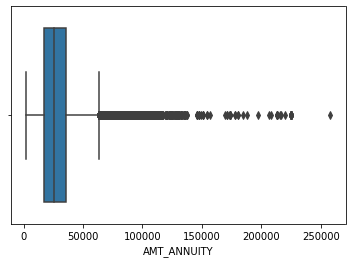

In [34]:
sns.boxplot(application_data.AMT_ANNUITY)
plt.show()

From the above graph for AMT_ANNUITY, we can see outliers are present.

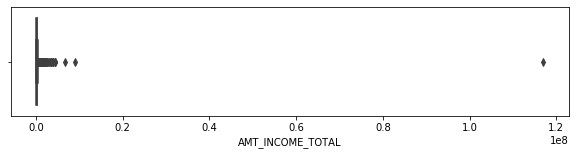

In [35]:
plt.figure(figsize=(10,2))
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show()

From the above graph for AMT_INCOME_TOTAL, we can see outliers are present.

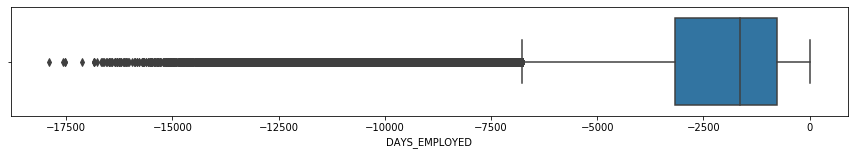

In [36]:
plt.figure(figsize=(15,2))
sns.boxplot(application_data.DAYS_EMPLOYED)
plt.show()

From the above graph for DAYS_EMPLOYED, we can see outliers are present.

#### Suggestion -
1. Excluding values outside 99%ile in each of the 3 variables

In [37]:
application_data=application_data[application_data.AMT_ANNUITY<np.nanpercentile(application_data['AMT_ANNUITY'], 99)]
application_data=application_data[application_data.DAYS_EMPLOYED<np.nanpercentile(application_data['DAYS_EMPLOYED'], 99)]
application_data=application_data[application_data.AMT_INCOME_TOTAL<np.nanpercentile(application_data['AMT_INCOME_TOTAL'], 99)]

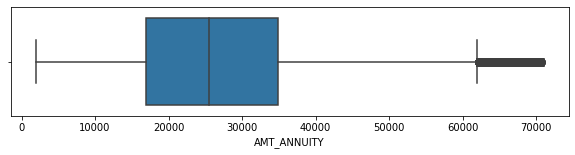

In [38]:
#Rechecking the columns
plt.figure(figsize=(10,2))
sns.boxplot(application_data.AMT_ANNUITY)
plt.show()

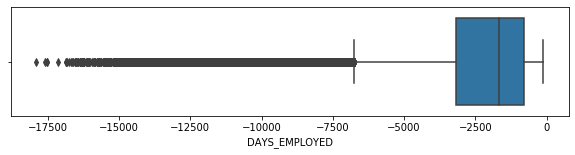

In [39]:
#Rechecking the columns
plt.figure(figsize=(10,2))
sns.boxplot(application_data.DAYS_EMPLOYED)
plt.show()

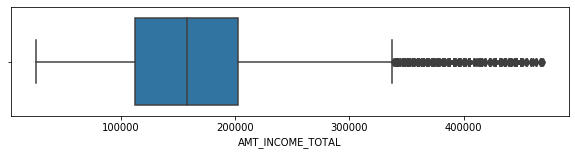

In [40]:
#Rechecking the columns
plt.figure(figsize=(10,2))
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show()

6. Binning continous variables.

In [41]:
#Creating binned income for better analysis.
application_data.loc[:,'INCOME_RANGE']=pd.qcut(application_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.20,0.50,0.90,1],
labels=['Low','Medium','High','Very_high'])

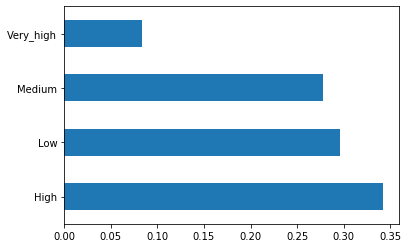

In [42]:
#Checking Binned Variable
application_data['INCOME_RANGE'].value_counts(normalize = True).plot.barh()
plt.show()

Most of the population have High Income_Range

Now, we can also calculate Age of person & Experience using Days_birth,Days_Employed.

In [43]:
application_data['Experience'] =application_data['DAYS_EMPLOYED']//365
application_data['Experience'] = application_data['Experience'].abs()

In [44]:
application_data['Age'] =application_data['DAYS_BIRTH']//365
application_data['Age'] = application_data['Age'].abs()

In [48]:
application_data = application_data.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1)

In [45]:
#Creating binned variable for AGE
application_data['AGE_GROUP']= pd.cut(application_data.Age,bins=np.linspace(20 ,70,num=11))

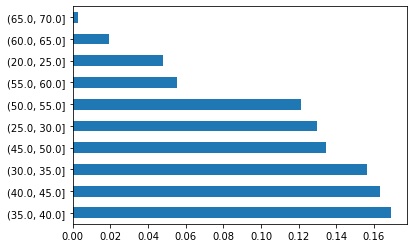

In [46]:
#Checking Binned Variable
application_data['AGE_GROUP'].value_counts(normalize = True).plot.barh()
plt.show()

- Most of the population is in 30 to 45 Age Range

#### Creating relavant Flags column's as Boolean datatype

In [47]:
application_data['CAR_flag']=np.where(application_data.FLAG_OWN_CAR == "Y",1,0).astype(object)
application_data['REALTY_flag']=np.where(application_data.FLAG_OWN_REALTY == "Y",1,0).astype(object)

In [49]:
len(application_data['TARGET'])

203846

### Calculating Imbalance Ratio

In [50]:
X = application_data[application_data.TARGET == 1]['TARGET'].count()
Y = application_data[application_data.TARGET == 0]['TARGET'].count()
A=(X/203846)*100.0
B=(Y/203846)*100.0
print(A, B)

8.853251964718464 91.14674803528153


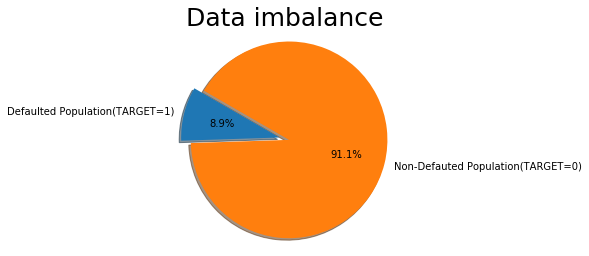

In [51]:
x = ['Defaulted Population(TARGET=1)','Non-Defauted Population(TARGET=0)']
y = [A, B]

explode = (0.1, 0)  # "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=150)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

We can see above Application data has high imbalance with Defaulted population at 8.9% as compared to Non-defualted population at 91.3%.

### Divide the Dataset into 2 sets i.e. Target=1 & Target = 0

In [52]:
Target_0=application_data[application_data.TARGET == 0]
Target_1=application_data[application_data.TARGET == 1]

### Categorical variable Analysis

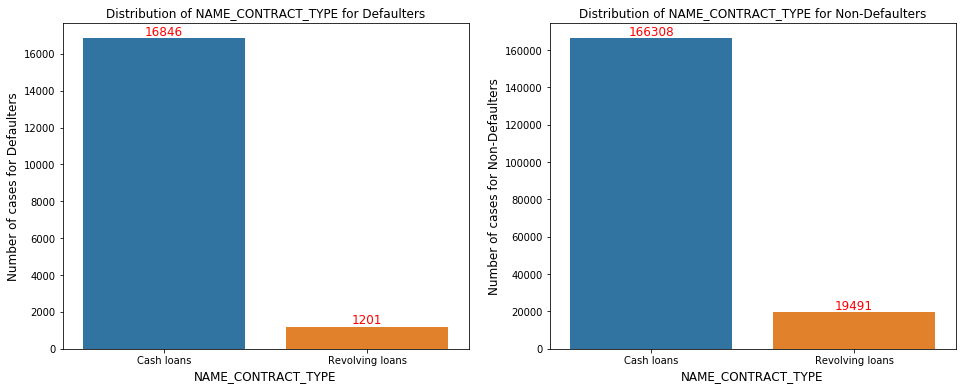

In [53]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
sns.countplot('NAME_CONTRACT_TYPE', data=Target_1)
plt.xlabel('NAME_CONTRACT_TYPE', fontsize=12)
plt.ylabel('Number of cases for Defaulters', fontsize=12)
plt.title('Distribution of NAME_CONTRACT_TYPE for Defaulters', fontsize=12)
ax = plt.gca()

# ylim max value to be set
y_max = application_data['NAME_CONTRACT_TYPE'].value_counts().max() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')
plt.subplot(1, 2, 2)
sns.countplot('NAME_CONTRACT_TYPE', data=Target_0)
plt.xlabel('NAME_CONTRACT_TYPE', fontsize=12)
plt.ylabel('Number of cases for Non-Defaulters', fontsize=12)
plt.title('Distribution of NAME_CONTRACT_TYPE for Non-Defaulters', fontsize=12)
ax = plt.gca()

# ylim max value to be set
y_max = application_data['NAME_CONTRACT_TYPE'].value_counts().max() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

- 1) Cash Loans are popular among population.
- 2) We can infer from above that revolving loans are comparatively safer.

#### Analysis for NAME_TYPE_SUITE

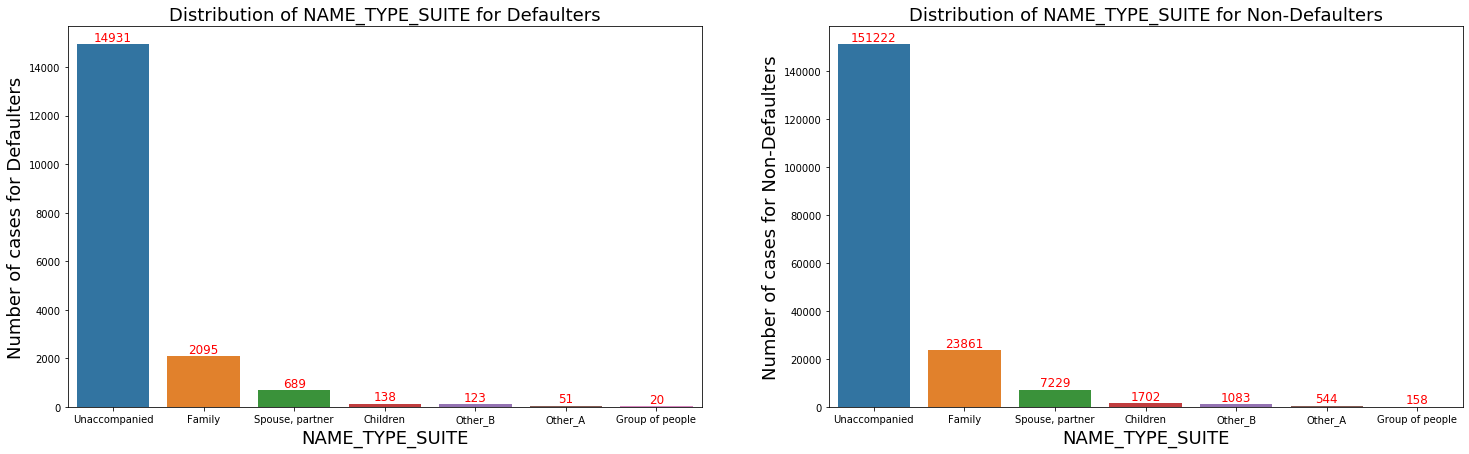

In [54]:
plt.figure(figsize=(25,7))
plt.subplot(1, 2, 1)
sns.countplot('NAME_TYPE_SUITE', data=Target_1,order = application_data['NAME_TYPE_SUITE'].value_counts().index)
plt.xlabel('NAME_TYPE_SUITE', fontsize=18)
plt.ylabel('Number of cases for Defaulters', fontsize=18)
plt.title('Distribution of NAME_TYPE_SUITE for Defaulters', fontsize=18)
ax = plt.gca()

# ylim max value to be set
y_max = application_data['NAME_TYPE_SUITE'].value_counts().max() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')
plt.subplot(1, 2, 2)
sns.countplot('NAME_TYPE_SUITE', data=Target_0, order = application_data['NAME_TYPE_SUITE'].value_counts().index)
plt.xlabel('NAME_TYPE_SUITE', fontsize=18)
plt.ylabel('Number of cases for Non-Defaulters', fontsize=18)
plt.title('Distribution of NAME_TYPE_SUITE for Non-Defaulters', fontsize=18)
ax = plt.gca()

# ylim max value to be set
y_max = application_data['NAME_TYPE_SUITE'].value_counts().max() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

Both populations have similar type of proportions so we can conclude from above it doesn't have any major impact on Loan distribution.

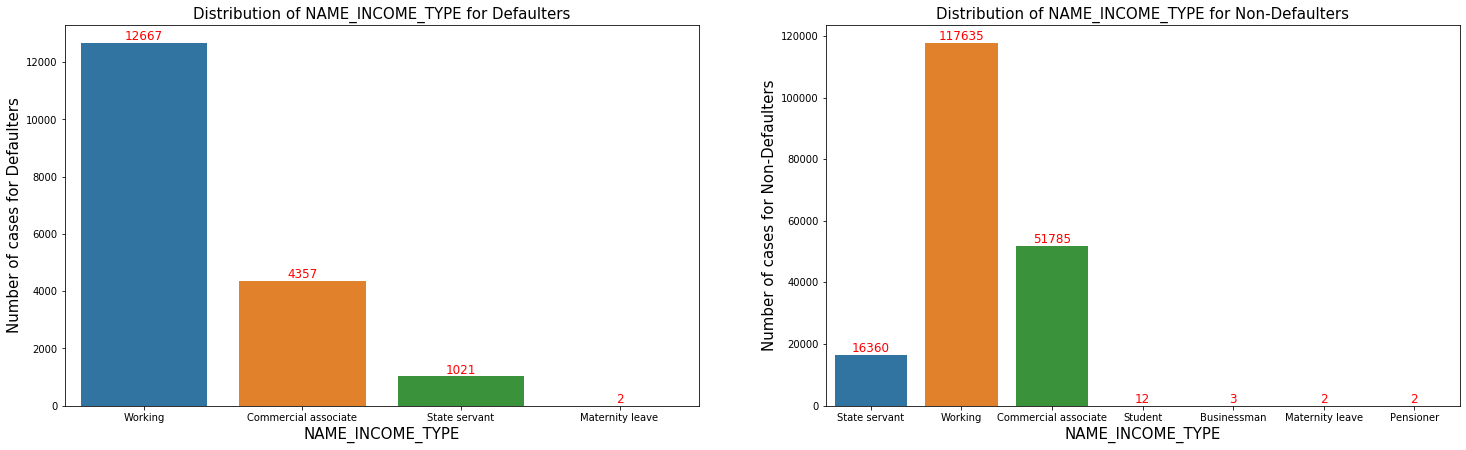

In [55]:
plt.figure(figsize=(25,7))
plt.subplot(1, 2, 1)
sns.countplot('NAME_INCOME_TYPE', data=Target_1)
plt.xlabel('NAME_INCOME_TYPE', fontsize=15)
plt.ylabel('Number of cases for Defaulters', fontsize=15)
plt.title('Distribution of NAME_INCOME_TYPE for Defaulters', fontsize=15)
ax = plt.gca()

# ylim max value to be set
y_max = application_data['NAME_INCOME_TYPE'].value_counts().max() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')
plt.subplot(1, 2, 2)
sns.countplot('NAME_INCOME_TYPE'
              , data=Target_0)
plt.xlabel('NAME_INCOME_TYPE', fontsize=15)
plt.ylabel('Number of cases for Non-Defaulters', fontsize=15)
plt.title('Distribution of NAME_INCOME_TYPE for Non-Defaulters', fontsize=15)
ax = plt.gca()

# ylim max value to be set
y_max = application_data['NAME_INCOME_TYPE'].value_counts().max() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

Working population are more prone to default.

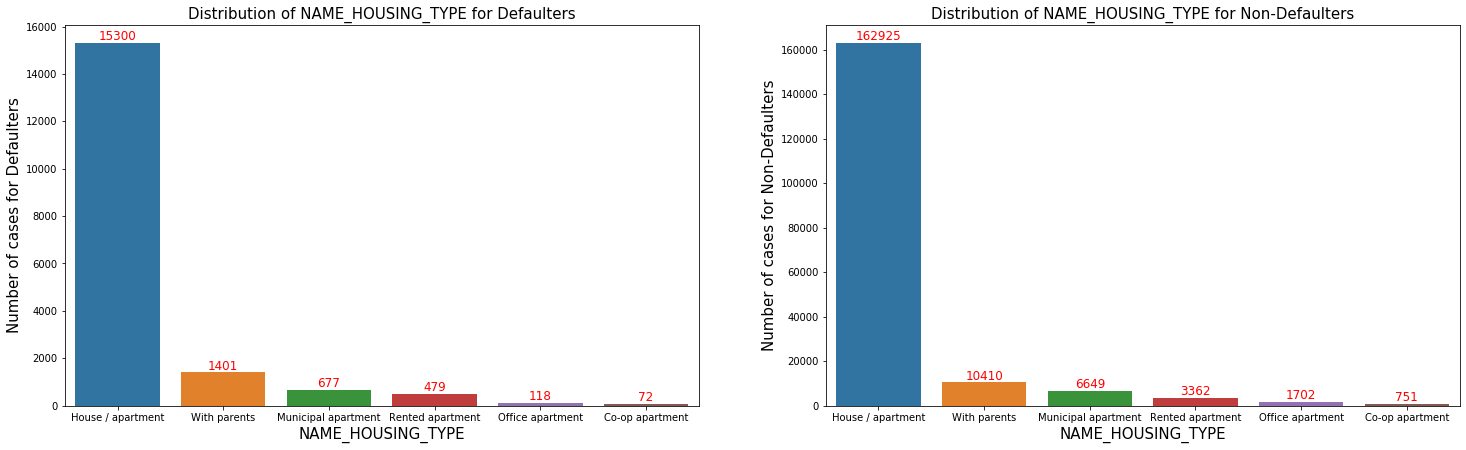

In [56]:
plt.figure(figsize=(25,7))
plt.subplot(1, 2, 1)
sns.countplot('NAME_HOUSING_TYPE'
              , data=Target_1
             ,order = application_data['NAME_HOUSING_TYPE'].value_counts().index)
plt.xlabel('NAME_HOUSING_TYPE', fontsize=15)
plt.ylabel('Number of cases for Defaulters', fontsize=15)
plt.title('Distribution of NAME_HOUSING_TYPE for Defaulters', fontsize=15)
ax = plt.gca()

# ylim max value to be set
y_max = application_data['NAME_HOUSING_TYPE'].value_counts().max() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')
plt.subplot(1, 2, 2)
sns.countplot('NAME_HOUSING_TYPE'
              , data=Target_0
             ,order = application_data['NAME_HOUSING_TYPE'].value_counts().index)
plt.xlabel('NAME_HOUSING_TYPE', fontsize=15)
plt.ylabel('Number of cases for Non-Defaulters', fontsize=15)
plt.title('Distribution of NAME_HOUSING_TYPE for Non-Defaulters', fontsize=15)
ax = plt.gca()

# ylim max value to be set
y_max = application_data['NAME_HOUSING_TYPE'].value_counts().max() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

- 1) % of People who have their own House/apartment getting defaulated are high for both distribution
- 2) Population living in Rented apartments and those living with parents have higher default rate as they have higher proportion in the Defaulted population as compared to non defaulted population.
- 3) Living in rental apartment means a cash outfow towards rent and thus less cash left for repayment of loan.
- 4) Living with parents may suggest that the incme is not too high and thus difficulty in repayment of loan.

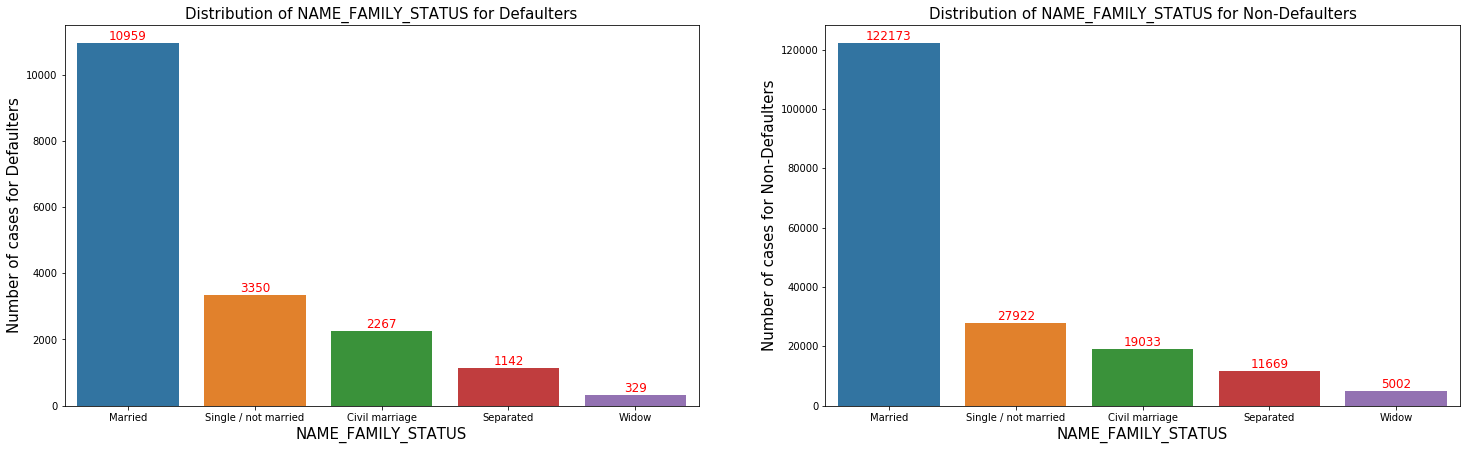

In [100]:
plt.figure(figsize=(25,7))
plt.subplot(1, 2, 1)
sns.countplot('NAME_FAMILY_STATUS',
               data=Target_1
              ,order = application_data['NAME_FAMILY_STATUS'].value_counts().index)
plt.xlabel('NAME_FAMILY_STATUS', fontsize=15)
plt.ylabel('Number of cases for Defaulters', fontsize=15)
plt.title('Distribution of NAME_FAMILY_STATUS for Defaulters', fontsize=15)
ax = plt.gca()

# ylim max value to be set
y_max = application_data['NAME_FAMILY_STATUS'].value_counts().max() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')
plt.subplot(1, 2, 2)
sns.countplot('NAME_FAMILY_STATUS'
              , data=Target_0
             , order = application_data['NAME_FAMILY_STATUS'].value_counts().index)
plt.xlabel('NAME_FAMILY_STATUS', fontsize=15)
plt.ylabel('Number of cases for Non-Defaulters', fontsize=15)
plt.title('Distribution of NAME_FAMILY_STATUS for Non-Defaulters', fontsize=15)
ax = plt.gca()

# ylim max value to be set
y_max = application_data['NAME_FAMILY_STATUS'].value_counts().max() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

##### Conclusion from the above graph :-
- Single/ not married is proportionally higher in dafaulted population as compared to non defaulted population. This shows that single applicants have higher defaults.
- Most of the people taking loans are married individuals & they are most people having difficulties in payments.
- Widow individuals, looks like are least interested in taking loans.

Distribution of Education for Defaulters
Secondary / secondary special    78.982656
Higher education                 15.808722
Incomplete higher                 3.712528
Lower secondary                   1.485011
Academic degree                   0.011082
Name: NAME_EDUCATION_TYPE, dtype: float64


Distribution of Education for Non Defaulters
Secondary / secondary special    69.556887
Higher education                 25.789697
Incomplete higher                 3.738449
Lower secondary                   0.863299
Academic degree                   0.051669
Name: NAME_EDUCATION_TYPE, dtype: float64


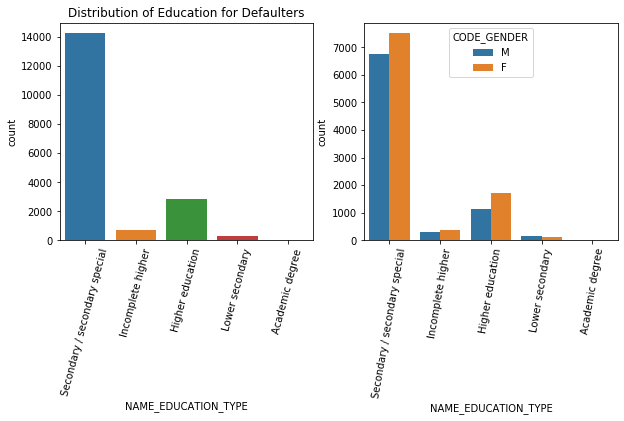

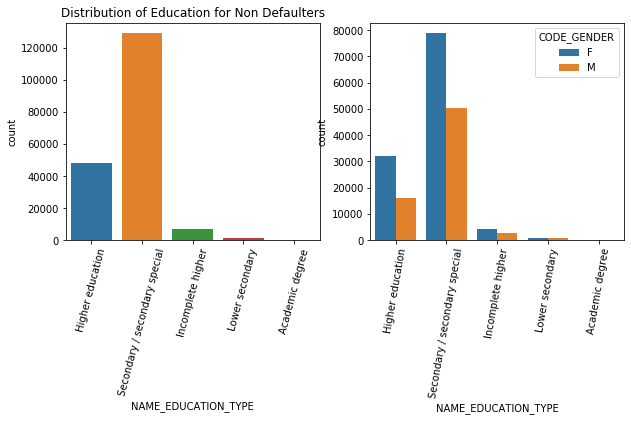

In [103]:
# Distribution among the education category

print('Distribution of Education for Defaulters')
print(Target_1.NAME_EDUCATION_TYPE.value_counts(normalize = True) * 100)
print('\n')
print('Distribution of Education for Non Defaulters')
print(Target_0.NAME_EDUCATION_TYPE.value_counts(normalize = True) * 100)

# graph of the above distribution
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
# plt.yscale('log')
plt.title('Distribution of Education for Defaulters')
chart = sns.countplot(x = 'NAME_EDUCATION_TYPE', data = Target_1)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 75)

plt.subplot(1,2,2)
# plt.yscale('log')
chart = sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data = Target_1)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 80)

plt.figure(figsize=[10,4])
plt.subplot(121)
plt.title('Distribution of Education for Non Defaulters')
chart = sns.countplot(x = 'NAME_EDUCATION_TYPE', data = Target_0)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 75)

plt.subplot(122)
chart = sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data = Target_0)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 80)

plt.show()

##### Conclusion from the above graph :->
- Most of the people in population have studied upto secondary/secondary special.
- It is very well evident that female are in better numbers in terms of receiving secondary/special & higher education.
- Females which have incomplete education are in higher numbers.
- Females who have not done good in lower secondary education but have done good in higher edu. demonstrates their fighting ability.
- Very few people, almost negligible population have studied or holds a Academic degree which is really weird.

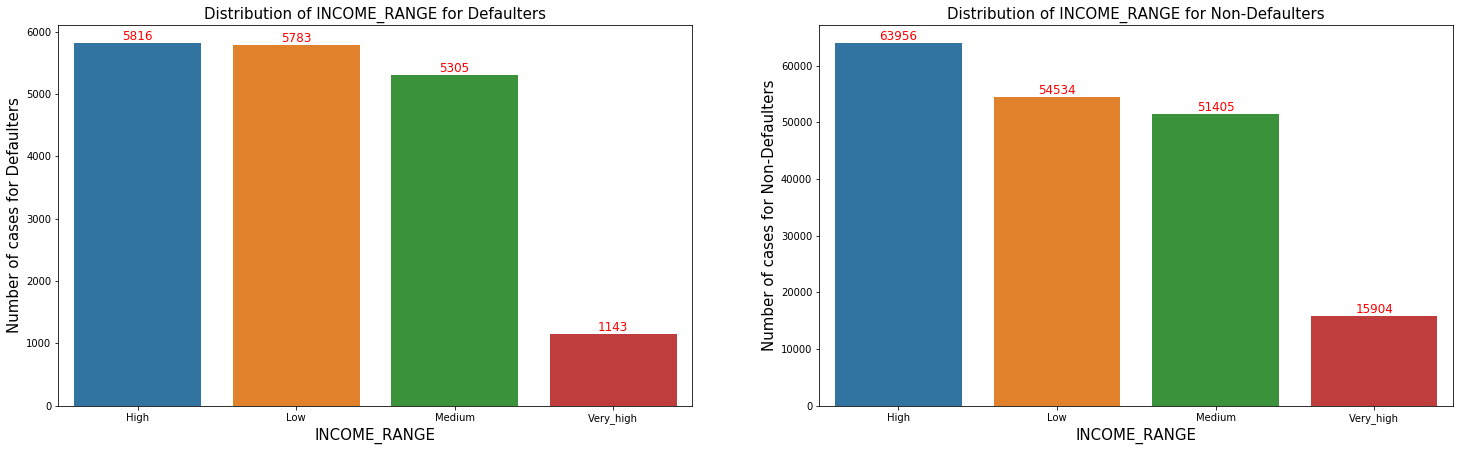

In [59]:
plt.figure(figsize=(25,7))
plt.subplot(1, 2, 1)
sns.countplot('INCOME_RANGE',
               data=application_data[application_data.TARGET == 1] 
              ,order = application_data['INCOME_RANGE'].value_counts().index)
plt.xlabel('INCOME_RANGE', fontsize=15)
plt.ylabel('Number of cases for Defaulters', fontsize=15)
plt.title('Distribution of INCOME_RANGE for Defaulters', fontsize=15)
ax = plt.gca()

# ylim max value to be set
y_max = application_data['INCOME_RANGE'].value_counts().max() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')
plt.subplot(1, 2, 2)
sns.countplot('INCOME_RANGE'
              , data=application_data[application_data.TARGET == 0]
             , order = application_data['INCOME_RANGE'].value_counts().index)
plt.xlabel('INCOME_RANGE', fontsize=15)
plt.ylabel('Number of cases for Non-Defaulters', fontsize=15)
plt.title('Distribution of INCOME_RANGE for Non-Defaulters', fontsize=15)
ax = plt.gca()

# ylim max value to be set
y_max = application_data['INCOME_RANGE'].value_counts().max() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

##### Conclusion from the above graph :->
- Low income range has higher defaults as their proportion in defaulted population is higher than in the non defaulted population

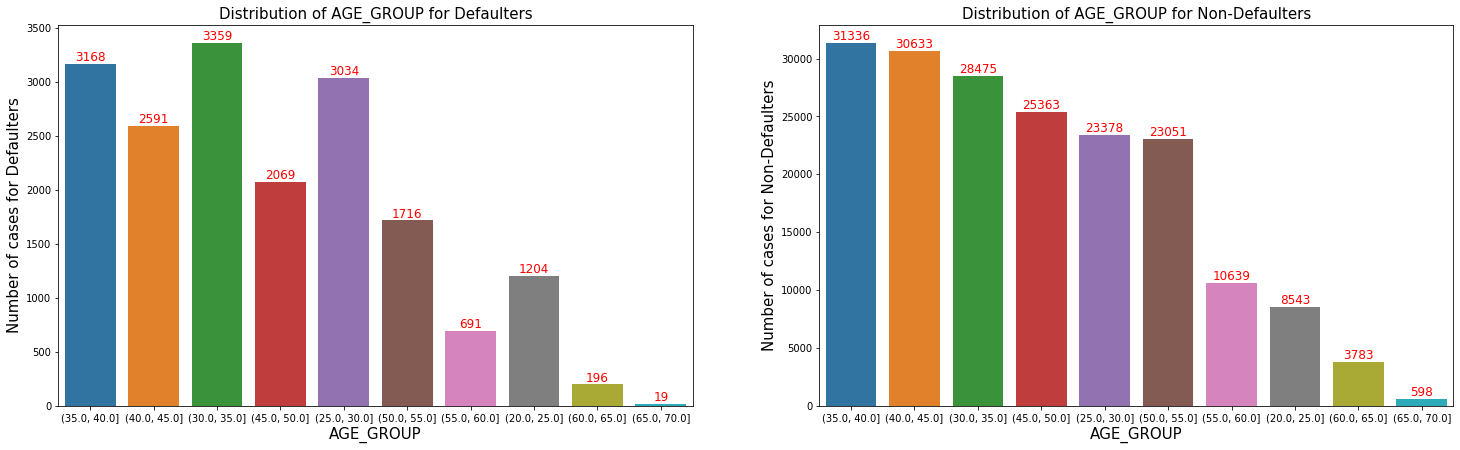

In [60]:
plt.figure(figsize=(25,7))
plt.subplot(1, 2, 1)
sns.countplot('AGE_GROUP',
               data=application_data[application_data.TARGET == 1] 
              ,order = application_data['AGE_GROUP'].value_counts().index)
plt.xlabel('AGE_GROUP', fontsize=15)
plt.ylabel('Number of cases for Defaulters', fontsize=15)
plt.title('Distribution of AGE_GROUP for Defaulters', fontsize=15)
ax = plt.gca()

# ylim max value to be set
y_max = application_data['AGE_GROUP'].value_counts().max() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')
plt.subplot(1, 2, 2)
sns.countplot('AGE_GROUP'
              , data=application_data[application_data.TARGET == 0]
             , order = application_data['AGE_GROUP'].value_counts().index)
plt.xlabel('AGE_GROUP', fontsize=15)
plt.ylabel('Number of cases for Non-Defaulters', fontsize=15)
plt.title('Distribution of AGE_GROUP for Non-Defaulters', fontsize=15)
ax = plt.gca()

# ylim max value to be set
y_max = application_data['AGE_GROUP'].value_counts().max() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

With Above graph we can see, people in range from 25 to 40 are prone to default.

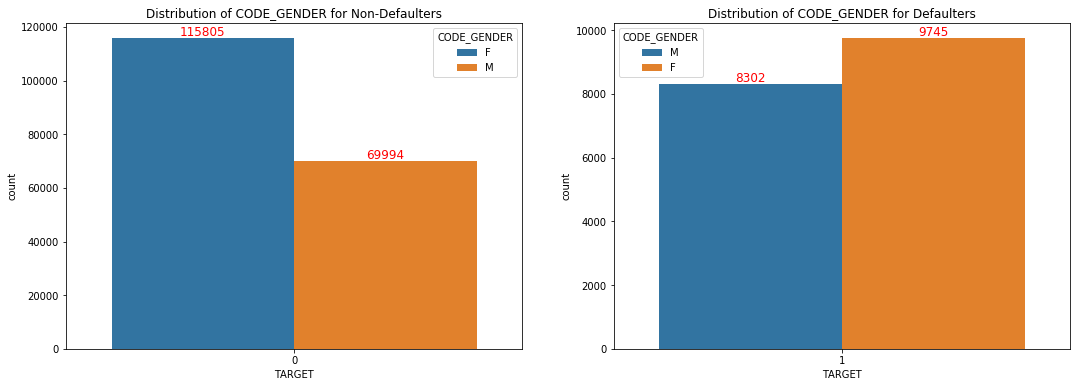

In [101]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target_0)
plt.title('Distribution of CODE_GENDER for Non-Defaulters', fontsize=12)
ax = plt.gca()

# ylim max value to be set
y_max = Target_0['TARGET'].value_counts().max() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target_1)
plt.title('Distribution of CODE_GENDER for Defaulters', fontsize=12)
ax = plt.gca()

# ylim max value to be set
y_max = Target_0['TARGET'].value_counts().max()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')
plt.show()

Both pattern looks similar. not able to decide on this.

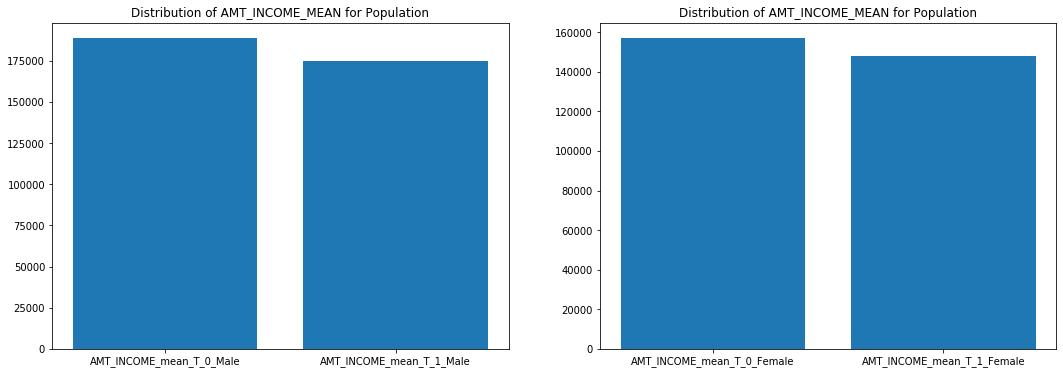

In [62]:
Male_Target_mean_0 = Target_0[Target_0.CODE_GENDER=='M']['AMT_INCOME_TOTAL'].mean()

Female_Target_mean_0 = Target_0[Target_0.CODE_GENDER=='F']['AMT_INCOME_TOTAL'].mean()

Male_Target_mean_1 = Target_1[Target_1.CODE_GENDER=='M']['AMT_INCOME_TOTAL'].mean()

Female_Target_mean_1 = Target_1[Target_1.CODE_GENDER=='F']['AMT_INCOME_TOTAL'].mean()

x_male = ['AMT_INCOME_mean_T_0_Male','AMT_INCOME_mean_T_1_Male']

y_male = [Male_Target_mean_0,Male_Target_mean_1]

x_Female = ['AMT_INCOME_mean_T_0_Female','AMT_INCOME_mean_T_1_Female']

y_Female = [Female_Target_mean_0,Female_Target_mean_1]
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.bar(x_male,y_male)
plt.title('Distribution of AMT_INCOME_MEAN for Population', fontsize=12)

plt.subplot(122)
plt.bar(x_Female,y_Female)
plt.title('Distribution of AMT_INCOME_MEAN for Population', fontsize=12)

plt.show()

Mean among male defaulters do have less income compared to non-defaulters.

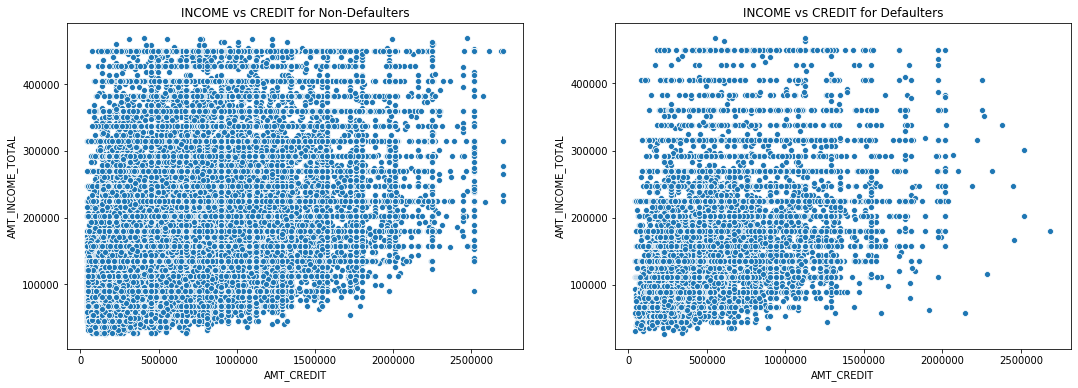

In [63]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=Target_0)
plt.title('INCOME vs CREDIT for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=Target_1)
plt.title('INCOME vs CREDIT for Defaulters')
plt.show()

Lower number of defaults where income is higher than 300k

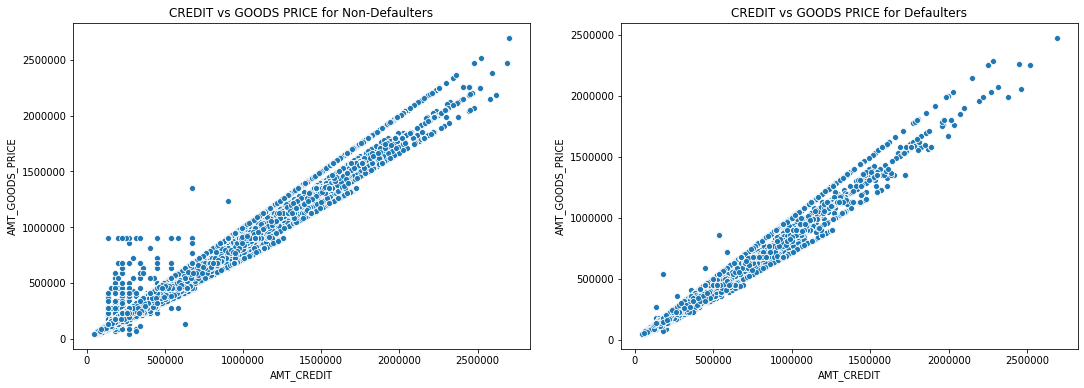

In [64]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=Target_0)
plt.title('CREDIT vs GOODS PRICE for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=Target_1)
plt.title('CREDIT vs GOODS PRICE for Defaulters')
plt.show()

Defaulters are less if price of good is upto 500k and amount credit is also less than 500k

#### Find corelation of numerical columns for Target_0, Target_1

In [65]:
int_columns = list(Target_0.select_dtypes('int64').columns)
float_columns = list(Target_0.select_dtypes('float').columns)

num_colmn_target_0 = int_columns + float_columns

target_0_columns = Target_0[num_colmn_target_0]

corr_target_0 = target_0_columns.corr()
round(corr_target_0, 2).abs()

,SK_ID_CURR,Experience,Age,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Experience,0.0,1.00,0.35,0.04,0.09,0.05,0.09,0.09,0.11,0.14
Age,0.0,0.35,1.00,0.06,0.16,0.10,0.15,0.14,0.15,0.14
AMT_INCOME_TOTAL,0.0,0.04,0.06,1.00,0.37,0.44,0.38,0.16,0.06,0.05
AMT_CREDIT,0.0,0.09,0.16,0.37,1.00,0.78,0.99,0.13,0.05,0.08
AMT_ANNUITY,0.0,0.05,0.10,0.44,0.78,1.00,0.78,0.12,0.04,0.07
AMT_GOODS_PRICE,0.0,0.09,0.15,0.38,0.99,0.78,1.00,0.13,0.05,0.08
EXT_SOURCE_2,0.0,0.09,0.14,0.16,0.13,0.12,0.13,1.00,0.09,0.20
EXT_SOURCE_3,0.0,0.11,0.15,0.06,0.05,0.04,0.05,0.09,1.00,0.08
DAYS_LAST_PHONE_CHANGE,0.0,0.14,0.14,0.05,0.08,0.07,0.08,0.20,0.08,1.00


In [66]:
corr_target_0 = corr_target_0.where(np.triu(np.ones(corr_target_0.shape), k=1).astype(np.bool))
corrtarget_0 = corr_target_0.unstack().reset_index()

corrtarget_0.columns = ['VAR1', 'VAR2', 'Correlation']
corrtarget_0.dropna(subset = ['Correlation'], inplace = True)
corrtarget_0['Correlation'] = round(corrtarget_0['Correlation'], 4)
corrtarget_0['Correlation'] = corrtarget_0['Correlation'].abs()

corrtarget_0.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.9860
54,AMT_ANNUITY,AMT_CREDIT,0.7773
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.7764
53,AMT_ANNUITY,AMT_INCOME_TOTAL,0.4415
63,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.3759
43,AMT_CREDIT,AMT_INCOME_TOTAL,0.3716
21,Age,Experience,0.3495
97,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,0.1979
73,EXT_SOURCE_2,AMT_INCOME_TOTAL,0.1620
42,AMT_CREDIT,Age,0.1566


##### Above is the top 10 correlation of numerical columns for dataframe df_target_0 i.e for target = 0

#### Correlation for numerical columns for target = 1 (Defaulter)

In [67]:
int_colmns = list(Target_1.select_dtypes('int64').columns)
float_colmns = list(Target_1.select_dtypes('float').columns)

num_colmn_target_1 = int_colmns + float_colmns

target_1_columns = Target_1[num_colmn_target_1]

corr_target_1 = target_1_columns.corr()
round(corr_target_1, 2).abs()

,SK_ID_CURR,Experience,Age,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,1.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00
Experience,0.00,1.00,0.30,0.03,0.11,0.05,0.12,0.10,0.05,0.17
Age,0.00,0.30,1.00,0.11,0.19,0.09,0.19,0.14,0.11,0.15
AMT_INCOME_TOTAL,0.01,0.03,0.11,1.00,0.34,0.41,0.35,0.14,0.07,0.09
AMT_CREDIT,0.00,0.11,0.19,0.34,1.00,0.75,0.98,0.12,0.06,0.12
AMT_ANNUITY,0.01,0.05,0.09,0.41,0.75,1.00,0.75,0.11,0.04,0.08
AMT_GOODS_PRICE,0.00,0.12,0.19,0.35,0.98,0.75,1.00,0.13,0.06,0.13
EXT_SOURCE_2,0.00,0.10,0.14,0.14,0.12,0.11,0.13,1.00,0.04,0.21
EXT_SOURCE_3,0.00,0.05,0.11,0.07,0.06,0.04,0.06,0.04,1.00,0.04
DAYS_LAST_PHONE_CHANGE,0.00,0.17,0.15,0.09,0.12,0.08,0.13,0.21,0.04,1.00


In [68]:
corr_target_1 = corr_target_1.where(np.triu(np.ones(corr_target_1.shape), k=1).astype(np.bool))
corrtarget_1 = corr_target_1.unstack().reset_index()

corrtarget_1.columns = ['VAR1', 'VAR2', 'Correlation']
corrtarget_1.dropna(subset = ['Correlation'], inplace = True)
corrtarget_1['Correlation'] = round(corrtarget_1['Correlation'], 4)
corrtarget_1['Correlation'] = corrtarget_1['Correlation'].abs()

corrtarget_1.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.9822
54,AMT_ANNUITY,AMT_CREDIT,0.7512
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.7494
53,AMT_ANNUITY,AMT_INCOME_TOTAL,0.4064
63,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.3454
43,AMT_CREDIT,AMT_INCOME_TOTAL,0.3428
21,Age,Experience,0.3049
97,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,0.2115
42,AMT_CREDIT,Age,0.1894
62,AMT_GOODS_PRICE,Age,0.1854


### Conclusion :->
- Almost all the variables for both the correlation in dataframe df_target_0 & df_target_1 is same.

Data Sanity Check for Previous Data

In [69]:
previous_application.isnull().sum()
# % null in each column upto 2 decimal places
print(round(100*(previous_application.isnull().sum()/len(previous_application.index)),2))

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [70]:
previous_application = previous_application.drop(labels=['RATE_INTEREST_PRIVILEGED',
                                                         'RATE_INTEREST_PRIMARY',
                                                         'RATE_DOWN_PAYMENT',
                                                         'AMT_DOWN_PAYMENT',
                                                         'DAYS_FIRST_DRAWING',
                                                         'DAYS_FIRST_DUE',
                                                         'DAYS_LAST_DUE_1ST_VERSION',
                                                         'DAYS_LAST_DUE',
                                                         'DAYS_TERMINATION',
                                                         'NFLAG_INSURED_ON_APPROVAL',
                                                         'CNT_PAYMENT',
                                                         'WEEKDAY_APPR_PROCESS_START',
                                                         'HOUR_APPR_PROCESS_START',
                                                         'FLAG_LAST_APPL_PER_CONTRACT',
                                                         'NFLAG_LAST_APPL_IN_DAY',
                                                         'SELLERPLACE_AREA'],axis=1)

#### Imputing values for Numerical Datatype columns - AMT_ANNUITY ,AMT_GOODS_PRICE 

In [71]:
previous_application['NAME_TYPE_SUITE'] = previous_application['NAME_TYPE_SUITE'].fillna(previous_application['NAME_TYPE_SUITE'].mode())

In [72]:
previous_application.shape

(1670214, 21)

In [73]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 21 columns):
SK_ID_PREV                1670214 non-null int64
SK_ID_CURR                1670214 non-null int64
NAME_CONTRACT_TYPE        1670214 non-null object
AMT_ANNUITY               1297979 non-null float64
AMT_APPLICATION           1670214 non-null float64
AMT_CREDIT                1670213 non-null float64
AMT_GOODS_PRICE           1284699 non-null float64
NAME_CASH_LOAN_PURPOSE    1670214 non-null object
NAME_CONTRACT_STATUS      1670214 non-null object
DAYS_DECISION             1670214 non-null int64
NAME_PAYMENT_TYPE         1670214 non-null object
CODE_REJECT_REASON        1670214 non-null object
NAME_TYPE_SUITE           849810 non-null object
NAME_CLIENT_TYPE          1670214 non-null object
NAME_GOODS_CATEGORY       1670214 non-null object
NAME_PORTFOLIO            1670214 non-null object
NAME_PRODUCT_TYPE         1670214 non-null object
CHANNEL_TYPE              1670214 non

In [74]:
previous_application.dtypes.value_counts()

object     14
float64     4
int64       3
dtype: int64

#### Analysing Numerical Variables for Previous_Data
###### 1) checking for Outliers

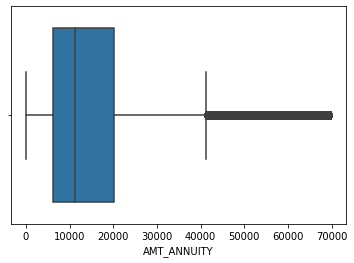

In [79]:
sns.boxplot(previous_application['AMT_ANNUITY'])
plt.show()

In [76]:
previous_application=previous_application[previous_application['AMT_ANNUITY']<np.nanpercentile(previous_application['AMT_ANNUITY'], 99)]

Excluding values outside 99%ile in each of the 3 variables

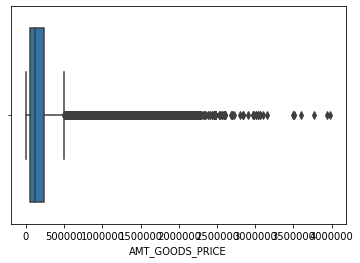

In [78]:
sns.boxplot(previous_application['AMT_GOODS_PRICE'])
plt.show()

In [80]:
previous_application=previous_application[previous_application['AMT_GOODS_PRICE']<np.nanpercentile(previous_application['AMT_GOODS_PRICE'], 99)]

Excluding values outside 99%ile in each of the 3 variables

#### Merging data with Previous data

In [82]:
combined_df = pd.merge(application_data, previous_application, how = 'left', on = ['SK_ID_CURR'])
combined_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,Experience,Age,AGE_GROUP,CAR_flag,REALTY_flag,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,1,0,Laborers,1,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0,0,0,0,0,1,High,2,26,"(25.0, 30.0]",0,1,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,Auto technology,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,1,1,0,1,1,0,Core staff,2,1,1,0,0,0,0,0,0,School,0.622246,0.500906,-828.0,0,0,0,0,0,0,High,4,46,"(45.0, 50.0]",0,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,Furniture,middle,POS industry with interest
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,1,1,0,1,1,0,Core staff,2,1,1,0,0,0,0,0,0,School,0.622246,0.500906,-828.0,0,0,0,0,0,0,High,4,46,"(45.0, 50.0]",0,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,middle,POS household with interest
3,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,1,1,1,0,Laborers,1,2,2,0,0,0,0,0,0,Government,0.555912,0.729567,-815.0,0,0,0,0,0,0,Low,1,53,"(50.0, 55.0]",1,1,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,-815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,Connectivity,middle,POS mobile without interest
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,1,0,0,Laborers,2,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.500906,-617.0,0,0,0,0,0,0,Medium,9,53,"(50.0, 55.0]",0,1,2078043.0,Cash loans,24246.000,675000.0,675000.0,675000.0,XNA,Approved,-181.0,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low_normal,Cash X-Sell: low


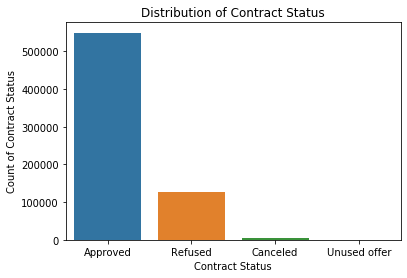

In [83]:
sns.countplot(combined_df.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

### Dividing the combined_df into different loan status dataframe

In [84]:
approved = combined_df[combined_df.NAME_CONTRACT_STATUS == 'Approved']

refused = combined_df[combined_df.NAME_CONTRACT_STATUS == 'Refused']

canceled = combined_df[combined_df.NAME_CONTRACT_STATUS == 'Canceled']

unused = combined_df[combined_df.NAME_CONTRACT_STATUS == 'Unused Offer']

In [85]:
print("Shape of the approved dataframe", approved.shape)
print("shape of refused dataframe", refused.shape)
print("shape of cancelled dataframe", canceled.shape)
print("shape of unused dataframe", unused.shape)

Shape of the approved dataframe (549179, 68)
shape of refused dataframe (125514, 68)
shape of cancelled dataframe (4812, 68)
shape of unused dataframe (0, 68)


In [86]:
print("Distribution in Approved dataframe\n", approved.TARGET.value_counts(normalize = True) * 100)
print("Distribution in Refused dataframe\n", refused.TARGET.value_counts(normalize = True) * 100)
print("Distribution in Cancelled dataframe\n", canceled.TARGET.value_counts(normalize = True) * 100)

Distribution in Approved dataframe
 0    91.655362
1     8.344638
Name: TARGET, dtype: float64
Distribution in Refused dataframe
 0    87.269149
1    12.730851
Name: TARGET, dtype: float64
Distribution in Cancelled dataframe
 0    90.752286
1     9.247714
Name: TARGET, dtype: float64


In [98]:
approved.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,Experience,Age,AGE_GROUP,CAR_flag,REALTY_flag,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,1,0,Laborers,1,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0,0,0,0,0,1,High,2,26,"(25.0, 30.0]",0,1,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,Auto technology,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,1,1,0,1,1,0,Core staff,2,1,1,0,0,0,0,0,0,School,0.622246,0.500906,-828.0,0,0,0,0,0,0,High,4,46,"(45.0, 50.0]",0,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,Furniture,middle,POS industry with interest
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,1,1,0,1,1,0,Core staff,2,1,1,0,0,0,0,0,0,School,0.622246,0.500906,-828.0,0,0,0,0,0,0,High,4,46,"(45.0, 50.0]",0,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,middle,POS household with interest
3,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,1,1,1,0,Laborers,1,2,2,0,0,0,0,0,0,Government,0.555912,0.729567,-815.0,0,0,0,0,0,0,Low,1,53,"(50.0, 55.0]",1,1,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,-815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,Connectivity,middle,POS mobile without interest
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,1,0,0,Laborers,2,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.500906,-617.0,0,0,0,0,0,0,Medium,9,53,"(50.0, 55.0]",0,1,2078043.0,Cash loans,24246.000,675000.0,675000.0,675000.0,XNA,Approved,-181.0,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low_normal,Cash X-Sell: low


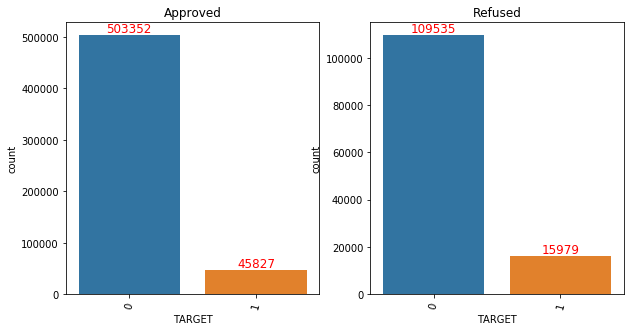

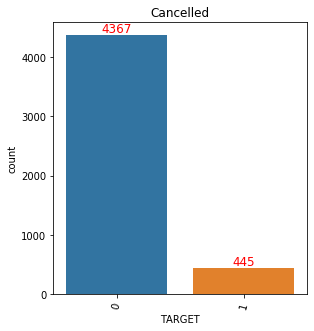

In [99]:
plt.figure(figsize = [10,5])
plt.subplot(121)
plt.title('Approved')
chart = sns.countplot(x = 'TARGET', data = approved)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 75)
ax = plt.gca()

# ylim max value to be set
y_max = approved['TARGET'].value_counts().sum() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

plt.subplot(122)
plt.title('Refused')
chart = sns.countplot(x = 'TARGET', data = refused)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 75)
ax = plt.gca()

# ylim max value to be set
y_max = approved['TARGET'].value_counts().sum()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

plt.figure(figsize = [10,5])
plt.subplot(121)
plt.title('Cancelled')
chart = sns.countplot(x = 'TARGET', data = canceled)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 75)

ax = plt.gca()

# ylim max value to be set
y_max = approved['TARGET'].value_counts().sum() 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

plt.show()

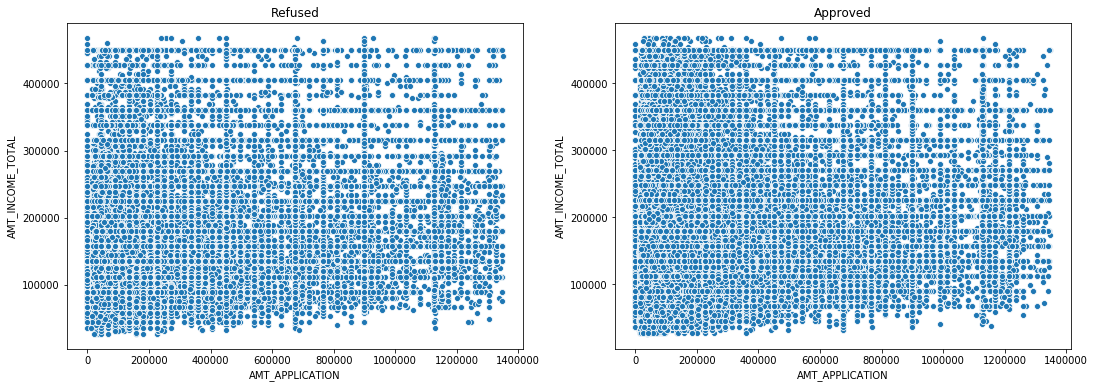

In [88]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=refused)
plt.title('Refused')

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=approved)
plt.title('Approved')
plt.show()

Loan request higher than 200k had a higher rejection rate. Also loan rejection rate was much lower if the income was higher than 500k.

# CONCLUSION

**1. Cash Loans are popular among population.**

**2. We can infer from above that revolving loans are comparatively safer.**

**3. Working population are more prone to default.**
**4. Population living in Rented apartments and those living with parents have higher default rate as they have higher proportion in the Defaulted population as compared to non defaulted population.**

**5. Single/ not married is proportionally higher in dafaulted population as compared to non defaulted population. This shows that single applicants have higher defaults.**

**6. secondary/secondary special are more prone to default.**

**7. Low income range has higher defaults as their proportion in defaulted population is higher than in the non defaulted population**

**8. 25-45 Age group are more prone to default.**

**9. Lower number of defaults where income is higher than 300k**

**10. Defaulters are less if price of good is upto 500k and amount credit is also less than 500k**
